In [1]:
# Import des librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import random
import time
from random import sample

import scrapy
import spacy
import nltk
import os
import requests
import re
import lxml
from bs4 import BeautifulSoup
import time
import string
import datetime

### Lecture d'une page web sur le site trustpilot

In [2]:
# Récupération des 20 couples (Titre + Commentaire) dans 1 page web (=response)
#                          .La note (nbStars) est déjà connue puisque passée en paramètre


def get_comments(response, vingt_comments, vingt_stars, nbStars):
    
    soup = BeautifulSoup(response.text, 'lxml')  

    # Boucle sur les 20 commentaires de la page  -  (UNE section 'review-card' = UN commentaire)
    for item in soup.findAll('div', {'class' : 'review-card'}):

        # note (1* à 5*) attribuée à chaque commentaire
        vingt_stars.append(nbStars)

        # Scraping du titre, utile si le commentaire est vide
        try:
            titre = item.find("h2", {"class":"review-content__title"}).getText()
        except AttributeError:
            titre = ""

        # Scraping du commentaire. Si le commentaire est vide, il est remplacé par le titre
        try:
            avi   = item.find("p", {"class":"review-content__text"}).getText()
        except AttributeError:      
            avi   = titre
        vingt_comments.append(avi)

    return

In [3]:
# Comptage des pages Web par catégorie de commentaire (1,2,3,4,5*) 
#
# Cellule facultative

token = 'https://fr.trustpilot.com/review/www.amazon.fr?page='   # page racine
star = '&stars='
nbPageMini=500
nbPageMaxi=0

x = datetime.datetime.now()
print("A la date du",x.strftime("%d/%m/%Y"),"il y a :\n")

for nbStar in range(1,5+1):
    for p in range(1,500):
        page = token + str(p) + star + str(nbStar)
        response = requests.get(page)
        if response.url != page:     # Il y a eu redirection =>  changement de catégorie de commentaires => nbStar+1
            if p-1 > nbPageMaxi:
                nbPageMaxi = p-1
            if p-1 < nbPageMini:
                nbPageMini = p-1
            break
            
    print(p-1,"pages de commentaires", nbStar,"*")

print("\nNombre de pages de commentaires Maximum :", nbPageMaxi)
print("Nombre de pages de commentaires Minimum :", nbPageMini)

A la date du 10/03/2020 il y a :

119 pages de commentaires 1 *
17 pages de commentaires 2 *
13 pages de commentaires 3 *
24 pages de commentaires 4 *
90 pages de commentaires 5 *

Nombre de pages de commentaires Maximum : 119
Nombre de pages de commentaires Minimum : 13


### Lecture de toutes les pages web

In [3]:
# Récupération de toutes les adresses de pages à scraper

commentaires= []    # Tous les commentaires de toutes les catégories (*,**,***,****,*****)
stars= []           # ensemble des notes / Une note est un nombre d'étoiles (1 à 5) attribuées à un commentaire.
pages1 = []         # Toutes les adresses de pages contenant les commentaires *
pages2 = []         # Toutes les adresses de pages contenant les commentaires **
pages3 = []         # Toutes les adresses de pages contenant les commentaires ***
pages4 = []         # Toutes les adresses de pages contenant les commentaires ****
pages5 = []         # Toutes les adresses de pages contenant les commentaires *****

nbCom0 = nbCom1 = nbCom2 = nbCom3 = nbCom4 = nbCom5 = 0   # nombre de commentaires pour chaque catégorie

# Hyper-paramètres:
nbPages=  200  # On récupére 'nbPages' pages soit (=nbPages*20) commentaires par type de note(1 à 5 étoiles)

# https://fr.trustpilot.com/review/www.amazon.fr?page=10&stars=1  ex: 10eme page des commentaires 1*
token = 'https://fr.trustpilot.com/review/www.amazon.fr?page='   # page racine
star5 = '&stars=5'
star4 = '&stars=4'
star3 = '&stars=3'
star2 = '&stars=2'
star1 = '&stars=1'


def get_pages1(token, nb):
    for i in range(1,nb+1):
        j = token + str(i) + star1;
        pages1.append(j);

def get_pages2(token, nb):
    for i in range(1,nb+1):
        j = token + str(i) + star2;
        pages2.append(j);

def get_pages3(token, nb):
    for i in range(1,nb+1):
        j = token + str(i) + star3;
        pages3.append(j);

def get_pages4(token, nb):
    for i in range(1,nb+1):
        j = token + str(i) + star4;
        pages4.append(j);

def get_pages5(token, nb):
    for i in range(1,nb+1):
        j = token + str(i) + star5;
        pages5.append(j);

# Constitution de la liste des pages web à Scraper
get_pages1(token, nbPages)    # commentaires *
get_pages2(token, nbPages)    # commentaires **
get_pages3(token, nbPages)    # commentaires ***
get_pages4(token, nbPages)    # commentaires ****
get_pages5(token, nbPages)    # commentaires *****


# Scraping du contenu de toutes les pages de commentaires 1*
for page in pages1:
    vingt_comments = []
    vingt_stars = []
    response = requests.get(page)
    url_out = response.url
    if url_out != page:   # Il y a eu redirection =>  on est arrivé à la dernière page des commentaires 1*
        break
    time.sleep(1)   # pour ne pas être signalé comme spam ou robot
    print(page)
    get_comments(response, vingt_comments, vingt_stars, 1)
    commentaires += vingt_comments
    stars += vingt_stars

# Scraping du contenu de toutes les pages de commentaires 2*
for page in pages2:
    vingt_comments = []
    vingt_stars = []
    response = requests.get(page)
    url_out = response.url
    if url_out != page:
        break
    time.sleep(1)
    print(page)
    get_comments(response, vingt_comments, vingt_stars, 2)
    commentaires += vingt_comments
    stars += vingt_stars

# Scraping du contenu de toutes les pages de commentaires 3*
for page in pages3:
    vingt_comments = []
    vingt_stars = []
    response = requests.get(page)
    url_out = response.url
    if url_out != page:
        break
    time.sleep(1)
    print(page)
    get_comments(response, vingt_comments, vingt_stars, 3)
    commentaires += vingt_comments
    stars += vingt_stars

# Scraping du contenu de toutes les pages de commentaires 4*
for page in pages4:
    vingt_comments = []
    vingt_stars = []
    response = requests.get(page)
    url_out = response.url
    if url_out != page:
        break
    time.sleep(1)
    print(page)
    get_comments(response, vingt_comments, vingt_stars, 4)
    commentaires += vingt_comments
    stars += vingt_stars
        
# Scraping du contenu de toutes les pages de commentaires 5*
for page in pages5:
    vingt_comments = []
    vingt_stars = []
    response = requests.get(page)
    url_out = response.url
    if url_out != page:
        break
    time.sleep(1)
    print(page)
    get_comments(response, vingt_comments, vingt_stars, 5)
    commentaires += vingt_comments
    stars += vingt_stars     


# Création d'un dataframe "commentaire-note"
df_comments = pd.DataFrame({'comment': commentaires, 'note': stars})

# sauvegarde des commentaires-notes
df_saveComments = df_comments.copy()

https://fr.trustpilot.com/review/www.amazon.fr?page=1&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=2&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=3&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=4&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=5&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=6&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=7&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=8&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=9&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=10&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=11&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=12&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=13&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=14&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=15&stars=1
https://fr.trustpilot.com/review/www.amazon.fr?page=16&stars=1
h

https://fr.trustpilot.com/review/www.amazon.fr?page=12&stars=2
https://fr.trustpilot.com/review/www.amazon.fr?page=13&stars=2
https://fr.trustpilot.com/review/www.amazon.fr?page=14&stars=2
https://fr.trustpilot.com/review/www.amazon.fr?page=15&stars=2
https://fr.trustpilot.com/review/www.amazon.fr?page=16&stars=2
https://fr.trustpilot.com/review/www.amazon.fr?page=17&stars=2
https://fr.trustpilot.com/review/www.amazon.fr?page=1&stars=3
https://fr.trustpilot.com/review/www.amazon.fr?page=2&stars=3
https://fr.trustpilot.com/review/www.amazon.fr?page=3&stars=3
https://fr.trustpilot.com/review/www.amazon.fr?page=4&stars=3
https://fr.trustpilot.com/review/www.amazon.fr?page=5&stars=3
https://fr.trustpilot.com/review/www.amazon.fr?page=6&stars=3
https://fr.trustpilot.com/review/www.amazon.fr?page=7&stars=3
https://fr.trustpilot.com/review/www.amazon.fr?page=8&stars=3
https://fr.trustpilot.com/review/www.amazon.fr?page=9&stars=3
https://fr.trustpilot.com/review/www.amazon.fr?page=10&stars=3
h

https://fr.trustpilot.com/review/www.amazon.fr?page=88&stars=5
https://fr.trustpilot.com/review/www.amazon.fr?page=89&stars=5
https://fr.trustpilot.com/review/www.amazon.fr?page=90&stars=5


In [4]:
# Nombre de commentaires par catégorie
x=0
print("Nombre total de commentaires :", len(df_comments))
print(len(df_comments.loc[df_comments['note']==1,:])," commentaires 1*")
print(len(df_comments.loc[df_comments['note']==2,:])," commentaires 2*")
print(len(df_comments.loc[df_comments['note']==3,:])," commentaires 3*")
print(len(df_comments.loc[df_comments['note']==4,:])," commentaires 4*")
print(len(df_comments.loc[df_comments['note']==5,:])," commentaires 5*")

Nombre total de commentaires : 5226
2377  commentaires 1*
338  commentaires 2*
251  commentaires 3*
470  commentaires 4*
1790  commentaires 5*


In [9]:
# Retour aux commentaires d'origine (avant les traitements)

df_comments = df_saveComments.copy()

### Définition des Hyper-paramètres

In [6]:
equal  =  False  # True/False: On traite ou pas un même nombre de commentaires par catégorie

nbCateg=  2      # 5    :  Conservation des 5 catégories de commentaires
                 # 2    :  Réduction à 2 catégories:  (4*,5*)-> catégorie 1  ET  (1*,2*)-> catégorie 0
                 #                                   - la catégorie 3* n'est pas prise en compte
 

### Prise en compte des Hyper-paramètres

In [7]:
listNb = [] # Nombre de commentaires par catégorie   

# Regroupement des catégories de commentaires:  (4*,5*)-> catégorie 1
#                                               (1*,2*)-> catégorie 0
#                                               (3*)   -> Cette catégorie n'est pas pris en compte
if nbCateg == 2:  
    df_comments.loc[df_comments['note'] == 1, 'note'] = 0
    df_comments.loc[df_comments['note'] == 2, 'note'] = 0
    df_comments.loc[df_comments['note'] == 4, 'note'] = 1
    df_comments.loc[df_comments['note'] == 5, 'note'] = 1
    df_comments = df_comments[df_comments.note != 3]   # Suppression des commentaires 3*

            
print("Il y a :")
if nbCateg == 2:
    # Regroupement des commentaires en deux catégories 0(1*,2*) et 1(4*,5*). La catégorie n'est prise en compte
    nbCom0 = len(df_comments.loc[df_comments['note']==0,:])
    nbCom1 = len(df_comments.loc[df_comments['note']==1,:])
    listNb.append(nbCom0); listNb.append(nbCom1)
    print(nbCom0," commentaires 0")   # commentaires  (1*,2*)
    print(nbCom1," commentaires 1")   # commentaires  (4*,5*)
else:
    nbCom1 = len(df_comments.loc[df_comments['note']==1,:])
    nbCom2 = len(df_comments.loc[df_comments['note']==2,:])
    nbCom3 = len(df_comments.loc[df_comments['note']==3,:])
    nbCom4 = len(df_comments.loc[df_comments['note']==4,:])
    nbCom5 = len(df_comments.loc[df_comments['note']==5,:])
    listNb.append(nbCom1); listNb.append(nbCom2); listNb.append(nbCom3); listNb.append(nbCom4); listNb.append(nbCom5)
    print(nbCom1," commentaires 1*")
    print(nbCom2," commentaires 2*")
    print(nbCom3," commentaires 3*")
    print(nbCom4," commentaires 4*")
    print(nbCom5," commentaires 5*")

    
# Ce plus petit nombre est utilisé si on veux traiter le même nombre de commentaires par catégorie
minNbCom = listNb[listNb.index(min(listNb))]
print("Le plus petit nombre de commentaire =", minNbCom)


# Réduction du nombre de commentaires selon les catégories pour respecter l'égalité
if equal == True:
    print("Un nombre égal de commentaires par catégorie")
    if nbCateg == 2:
        # Regroupement des commentaires en deux catégories:
        df_comments0 = df_comments.loc[df_comments['note']==0,:]
        indices = sample(range(nbCom0), minNbCom); df_comments0min = df_comments0.iloc[indices,:]
        df_comments1 = df_comments.loc[df_comments['note']==1,:]
        indices = sample(range(nbCom1), minNbCom); df_comments1min = df_comments1.iloc[indices,:]
        df_comments = pd.concat([df_comments0min, df_comments1min], axis=0)
        print(len(df_comments0min),";",len(df_comments1min))
    else:
        df_comments1 = df_comments.loc[df_comments['note']==1,:]
        indices = sample(range(nbCom1), minNbCom); df_comments1min = df_comments1.iloc[indices,:]
        df_comments2 = df_comments.loc[df_comments['note']==2,:]
        indices = sample(range(nbCom2), minNbCom); df_comments2min = df_comments2.iloc[indices,:]
        df_comments3 = df_comments.loc[df_comments['note']==3,:]
        indices = sample(range(nbCom3), minNbCom); df_comments3min = df_comments3.iloc[indices,:]
        df_comments4 = df_comments.loc[df_comments['note']==4,:]
        indices = sample(range(nbCom4), minNbCom); df_comments4min = df_comments4.iloc[indices,:]
        df_comments5 = df_comments.loc[df_comments['note']==5,:]
        indices = sample(range(nbCom5), minNbCom); df_comments5min = df_comments5.iloc[indices,:]
        df_comments = pd.concat([df_comments1min, df_comments2min, df_comments3min, df_comments4min, df_comments5min], axis=0)
        print(len(df_comments1min),";",len(df_comments2min),";",len(df_comments3min),";",len(df_comments4min),";", \
              len(df_comments5min))

Il y a :
2715  commentaires 0
2260  commentaires 1
Le plus petit nombre de commentaire = 2260


## Traitement des commentaires

### Pré-Traitement

In [8]:
#   1. Suppression des liens hypertexte
#   2. Suppression des Tags
#   3. Suppression des emoticones

import emoji

def give_emoji_free_text(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def pre_traite(com):
    com = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|''(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", com)
    com = re.sub("(@[A-Za-z0-9_]+)","", com)
    com = re.sub("(#[A-Za-z0-9_]+)","", com)
    com = give_emoji_free_text(com)           # bien que la Lemmatization supprime les emoticones
    return(com)

print("AVANT:\n", df_comments.iloc[x])
df_comments['comment'] = df_comments['comment'].apply(pre_traite)
print("\nAPRES:\n", df_comments.iloc[x])

AVANT:
 comment    \n                Suite à mon achat sur Amazon...
note                                                       0
Name: 0, dtype: object

APRES:
 comment    Suite à mon achat sur Amazon pour les fêtes de...
note                                                       0
Name: 0, dtype: object


### Tokenisation

In [9]:
# Tokenisation des commentaires en MOTS avec NLTK (++)

tokenizer = nltk.RegexpTokenizer(r'\w+')

def to_token(com):
    com = tokenizer.tokenize(com.lower())   # majuscule -> minuscule
    #com = tokenizer.tokenize(com)
    return(com)

print("AVANT:\n", df_comments.iloc[x])
df_comments['comment'] = df_comments['comment'].apply(to_token)
print("\nAPRES:\n", df_comments.iloc[x])

AVANT:
 comment    Suite à mon achat sur Amazon pour les fêtes de...
note                                                       0
Name: 0, dtype: object

APRES:
 comment    [suite, à, mon, achat, sur, amazon, pour, les,...
note                                                       0
Name: 0, dtype: object


### Suppression des stopwords

In [10]:
# Exclure les stopwords français + ponctution => Suppression du bruit des données
from nltk.corpus import stopwords

# nltk.download()   # provoque l'affichage de la console NLTK downloader
nltk.download('stopwords')

stop_words = stopwords.words('french')   # list

# On peut rajouter à 'stop_words' certains mots en fonction de la tâche, comme la ponctuation
exclude = set(string.punctuation)
stop_words.extend(exclude)

def del_stopwords(com):
    com = [word for word in com if word not in stop_words and word.isalpha()]
    return(com)

print("AVANT:\n", df_comments.iloc[x])
df_comments['comment'] = df_comments['comment'].apply(del_stopwords)
print("\nAPRES:\n", df_comments.iloc[x])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
AVANT:
 comment    [suite, à, mon, achat, sur, amazon, pour, les,...
note                                                       0
Name: 0, dtype: object

APRES:
 comment    [suite, achat, amazon, fêtes, fin, année, a, t...
note                                                       0
Name: 0, dtype: object


### Lemmatisation

In [11]:
import fr_core_news_md

nlp = fr_core_news_md.load()
delimiteur = ' '

def lemmatize(com):
    new_sentence = []
    doc = nlp(delimiteur.join(com))   # convertit une list en str
    for word in doc:
        new_sentence.append(word.lemma_)
    return(new_sentence)


x=0
print("AVANT:\n", df_comments.iloc[x])
df_comments['comment'] = df_comments['comment'].apply(lemmatize)
print("\nAPRES:\n", df_comments.iloc[x])

AVANT:
 comment    [suite, achat, amazon, fêtes, fin, année, a, t...
note                                                       0
Name: 0, dtype: object

APRES:
 comment    [suite, achat, amazon, fête, fin, année, avoir...
note                                                       0
Name: 0, dtype: object


### Suppression des entités nommées (Named-Entity Recognition = NER)

In [12]:
# SpaCy compte 17 types d’entités reconnues :    PERSON, NORP, FACILITY, ORG, GPE, LOC, PRODUCT, EVENT, WORK_OF_ART, 
#                                                LANGUAGE, DATE, TIME, PERCENT, MONEY, QUANTITY, ORDINAL CARDINAL.
    
nlp_fr = spacy.load('fr_core_news_md')

delimiteur = ' '
org    = []
person = []
loc    = []
misc   = []

def to_ner(comment):
    com = delimiteur.join(comment)   # convertit une list en str
    doc = nlp_fr(com)

    for ent in doc.ents:
        if ent.label_ == "ORG":
            org.append(ent.text)
        elif ent.label_ == "PER":
            person.append(ent.text)
        elif ent.label_ == "LOC":
            loc.append(ent.text)
        elif ent.label_ == "MISC":   # n'améliore pas le TBC (taux de bon classement)
            misc.append(ent.text)

df_comments['comment'].apply(to_ner)

print("Organisations :", org)
print("\nPersonnes :", person)
print("\nLieux :", loc)
print("\nMisc :", misc)


# On retire du corpus l'ensemble des ORG, PER et LOC.  Le Taux de bon classement nous dira si c'est une bonne idée
ner_words = org + person + loc

def del_nerwords(com):
    com = [word for word in com if word not in ner_words]
    return(com)

print("AVANT:\n", df_comments.iloc[x])
df_comments['comment'] = df_comments['comment'].apply(del_nerwords)
print("\nAPRES:\n", df_comments.iloc[x])


Organisations : ['chiffre concern', 'recontacter amazon', 'amazon avocat', 'amazon justice', 'bye bye amazon', 'corte bravo amazon amazon grand zéro bezos', 'amazon', 'remboursemer', 'vai', 'amazon colis', 'forc', 'recontacter', 'ru', 'novembr', 'amazon', 'galèrer salopard', 'ps', 'marketplace amazon', 'colissimo international courrier post', 'eta', 'prb', 'amazon', 'inexister', 'samsung', 'samsung', 'europe', 'mèr', 'service fraud amazon', 'alexa amazon', 'amazon', 'amazon société arnaqueur', 'amazonvoilà', 'aid banque', 'cb', 'kms', 'amazon command', 'chronopost', 'amazon france', 'amazon logistics', 'amazon vendu', 'otr', 'customers first', 'amazon', 'cdiscount', 'hi fi', 'amazon', 'carte michelin', 'ds', 'amazon', 'cdiscount', 'marchandis amazon', 'livraison post', 'enorm', 'apré', 'cdiscount ebay', 'nike', 'kms avion', 'amazon', 'amazon colis arriver mauvais état', 'amazon fuyez sit', 'amazon logistics', 'maimouna amazon frmaimouna', 'maimouna', 'formulairemaimouner', 'cartemoi', 

Personnes : ['tentativ', 'mars', 'dingueaujourd hui mars', 'personn', 'gros daube honteu', 'remanufacturés réemballés', 'receptionné', 'comerciale', 'marcel', 'problème justic', 'mars', 'livraiser', 'fai', 'amazon', 'résoude problème', 'mésaventure groupon', 'équilibr', 'excus', 'agressivemer', 'parlon', 'rtt', 'refacturer', 'retourneren somm', 'boutiqu', 'vod', 'établ', 'azone almagne', 'conseilier', 'fai', 'crem', 'bonjourinadmissible', 'amazonchanger', 'incapablesbloquer', 'supposémer', 'conner', 'quell', 'étoil', 'bonjourj', 'autocollant carrer', 'commentair', 'commentair', 'amazon inexister', 'problèm manqu', 'amazone airpods', 'arnaqu', 'amazone moqu', 'amazone utilis', 'amazone ca', 'recevez marchandise', 'tondeuse oneblade', 'tondeus', 'clientèl nasreddine', 'apre raccroch', 'info', 'info', 'journe debiter', 'resoudre probleme', 'appell', 'blagu', 'banqu', 'ray', 'inexister', 'della favola', 'personn', 'débrouillez', 'loisirinsupportable', 'jai', 'méthoder', 'couvercl', 'chèqu 

Lieux : ['lign', 'portugal', 'leçoncordialement', 'luxembourg', 'commende', 'chine', 'cdscount', 'peinebde', 'hont', 'occurrenc', 'bataill', 'maroc', 'mètr', 'cest', 'mentirune', 'cadr', 'ciao', 'nada', 'eur', 'france', 'dindon', 'pann', 'serrai', 'ca', 'hont', 'hont', 'noteamazon', 'cloturer', 'clier', 'france', 'pann', 'etat', 'france', 'hont', 'pann', 'rome', 'france', 'bonjouret', 'commandrai', 'collect', 'gest', 'paris france', 'ca', 'france', 'col blanc cravate', 'dindon', 'place visu', 'voila', 'france', 'clichy', 'novembr', 'chin', 'angleterre', 'mons péleve', 'amazone', 'cher', 'voulai', 'suisse', 'chin', 'amazonj', 'amazon', 'deccolis', 'décommande', 'appli', 'demand', 'boisine', 'st priest', 'demand', 'coqu', 'recommanderais', 'décembr', 'clier', 'ommande', 'incompetent', 'al tarmo', 'exigeon', 'hont', 'cheminéeil', 'articleune', 'boiscet', 'cobdulter', 'chine', 'st glinglin', 'nxqu', 'france', 'rue gard', 'rue gard plain rue plain', 'ca', 'lallaing', 'ca', 'debuie', 'connai

Misc : ['st valentin', 'ok tampi st valentin', 'imcapabl', 'st valentin', 'livreur amazon', 'scene contacter amazone', 'europcar', 'message mail', 'sav', 'book', 'amazon', 'si', 'call center', 'decu amazon com', 'amazon', 'service clier', 'honteu', 'hui', 'amazon', 'voila mésaventure livreur', 'amazon inscrire office', 'super déçu commande jamais recues', 'si', 'amazon nullissime', 'post', 'felicitation', 'amazon prime video xbox', 'ça marche', 'amazon', 'amazon', 'honteu', 'clientèl livraison', 'amazon', 'amazon marketplace', 'cow boy', 'x', 'adhèré amazon prime catastrophe livraison', 'patienc compréhension', 'imbecile', 'incroyable honteu', 'jai renvoye paire basket', 'jai renvoye bon', 'post appel', 'amazon livre colis jamais', 'cordonnee', 'pc gamer', 'pc', 'post', 'sms', 'chronopost', 'amazon', 'jen', 'amazon', 'post', 'amazon', 'amazon', 'tord', 'ca', 'livreur', 'musiqu', 'accelerateur amazon', 'st valentin', 'ber', 'domo malhonnête', 'annul amazon prime', 'cd', 'mr x mme x', 'a

AVANT:
 comment    [suite, achat, amazon, fête, fin, année, avoir...
note                                                       0
Name: 0, dtype: object

APRES:
 comment    [suite, achat, fête, fin, année, avoir, tentat...
note                                                       0
Name: 0, dtype: object


### Suppression des mots les plus fréquents / catégorie


 30 mots les plus fréquents de la catégorie 0 :
 [('avoir', 3615), ('plus', 2081), ('faire', 2013), ('commande', 1922), ('colis', 1648), ('client', 1607), ('livraison', 1567), ('service', 1529), ('tout', 1153), ('jour', 1120), ('chez', 968), ('livrer', 912), ('rien', 895), ('jamais', 849), ('pouvoir', 832), ('recevoir', 832), ('bien', 816), ('dire', 815), ('compte', 802), ('aller', 750), ('cela', 744), ('commander', 739), ('donc', 739), ('sans', 717), ('car', 706), ('aucun', 699), ('vendeur', 689), ('si', 685), ('depuis', 679), ('article', 678)]

 30 mots les plus fréquents de la catégorie 1 :
 [('très', 950), ('livraison', 943), ('avoir', 938), ('commande', 836), ('tout', 798), ('toujours', 648), ('service', 631), ('plus', 602), ('prix', 556), ('jamais', 543), ('problème', 539), ('client', 513), ('rapide', 505), ('bien', 476), ('faire', 467), ('bon', 424), ('pouvoir', 365), ('produit', 325), ('produire', 309), ('chez', 303), ('sans', 301), ('si', 296), ('depuis', 295), ('colis', 285)

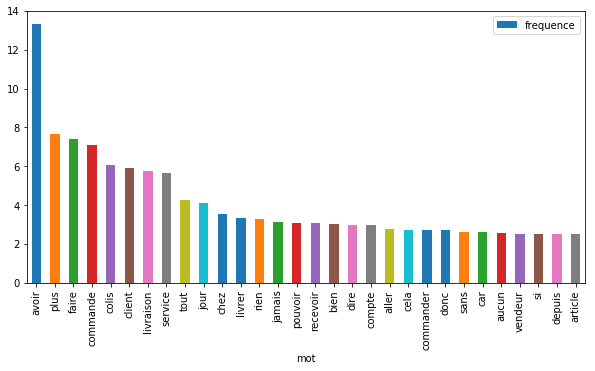

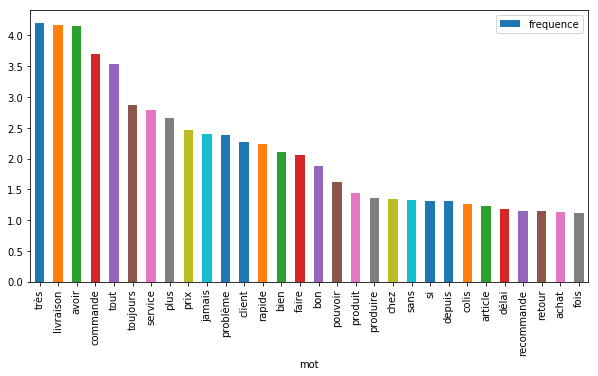

In [13]:
from collections import defaultdict


corpora = defaultdict(list)   # type de dictionnaire (Clé,Valeur) dont la valeur est une liste qui peut être incrémentée
freq_totale = nltk.Counter()

# Création du Corpus pour chaque catégorie de commmentaires :
def agreg_comments(row):
    corpora[row['note']] += row['comment']

df_comments.apply(agreg_comments, axis=1)

df_freq = pd.DataFrame(columns=['mot', 'frequence', 'categ', 'nbcom'])
stats, freq = dict(), dict()
nbWordDel= 30
    
for k, v in corpora.items():
    freq[k] = nltk.FreqDist(v)   # fréquence pour la catégorie k
    freq_totale += freq[k]       # fréquence toute catégorie confondue

    
# Attention (0,1) OU (1,2,3,4,5)
start = 0
end   = nbCateg
if nbCateg == 5:
    start +=1
    end +=1

for c in range(start, end):
    liste_tuple = freq[c].most_common(nbWordDel)
    print("\n", nbWordDel, "mots les plus fréquents de la catégorie", c, ":\n", liste_tuple)
    mots_frequent = [elem[0] for elem in liste_tuple]             # prend le 1er element de chaque tuple, c'est à dire le mot

    # Remplissage ligne par ligne du dataframe 'df_freq'
    for mot, frequence in liste_tuple:
        un_mot = list()
        un_mot.append(mot)
        un_mot.append(frequence)
        un_mot.append(c)
        if c == 0:
            un_mot.append(nbCom0)
        elif c == 1:
            un_mot.append(nbCom1)
        elif c == 2:
            un_mot.append(nbCom2)
        elif c == 3:
            un_mot.append(nbCom3)
        elif c == 4:
            un_mot.append(nbCom4)
        elif c == 5:
            un_mot.append(nbCom5)
        df_freq.loc[len(df_freq)] = un_mot       # ajout une ligne

        
# Correction de la fréquence pour tenir compte du nombre de commentaires/catégorie
df_freq['frequence'] = (df_freq['frequence']/df_freq['nbcom'])*10      # = (nbApparition/nbCommentaire par catégorie)*10

for c in range(start, end):
    imageName = "freq" + str(c)
    df_1categ = df_freq[df_freq.categ == c]            # sélectionne les lignes d'1 catégorie de commentaire ... 
    
    # ... et affiche la fréquence des 'nbWordDel' mots les plus fréquents.
    df_1categ.plot(kind='bar', x='mot', y='frequence', figsize=(10,5)).get_figure().savefig(imageName)

print("\n", df_freq)



# ------------------ Suppression  du corpus de chaque catégorie des nbWordDel les plus fréquents ----------------
#
motFreqCateg = dict()    # Clé= une catégorie de commentaire, Valeur= liste des mots les plus fréquents de cette catégorie

for c in range(start, end):
    df_1categ = df_freq[df_freq.categ == c]
    motFreqCateg[c] = df_1categ['mot'].tolist()

def del_freqwords(com, freq_words):
    com = [word for word in com if word not in freq_words]
    return(com)

df_comments['comment'] = df_comments.apply(lambda x: del_freqwords(x.comment, motFreqCateg[x.note]), axis=1)

### WordCloud

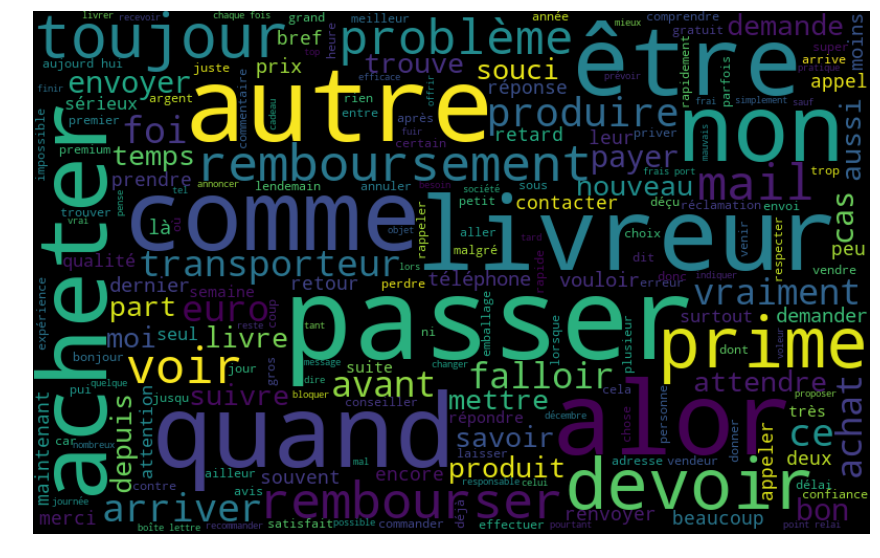

In [13]:
# WordCloud toute catégorie de commentaire confondue

from wordcloud import WordCloud

delimiteur = ' '
all_text = " "
texte = []

def wordcloud(comment):
    com = delimiteur.join(comment)   # convertit une list en str
    texte.append(com)
    
df_comments['comment'].apply(wordcloud)

all_text = ' '.join([text for text in texte])    # réunir les commentaires en un seul texte
    
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_text)
fig = plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');


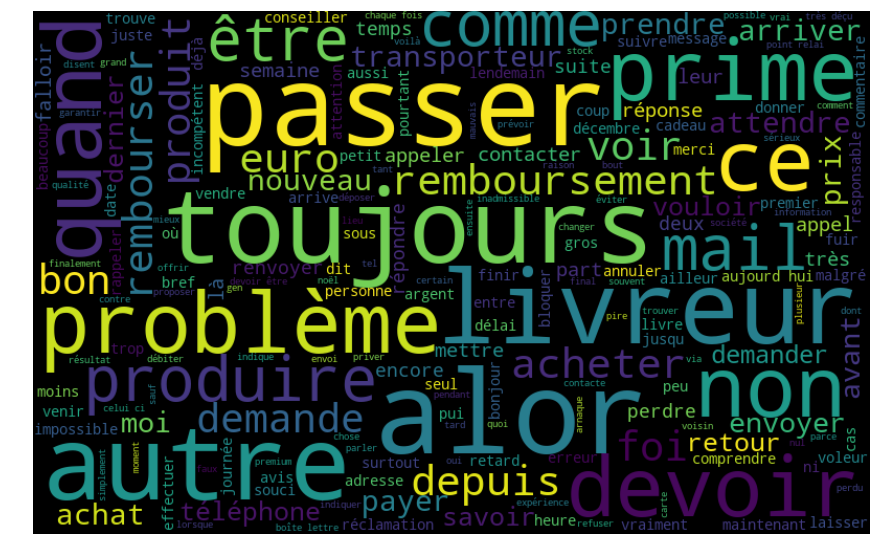

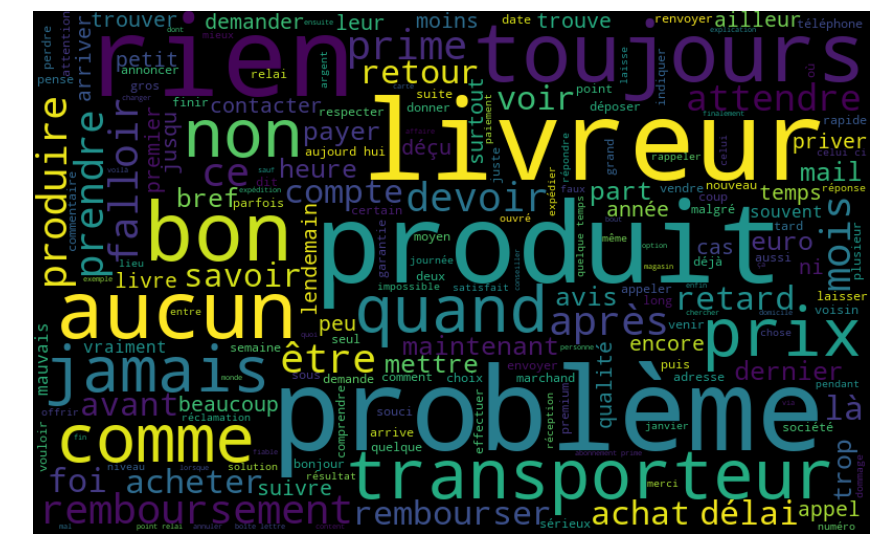

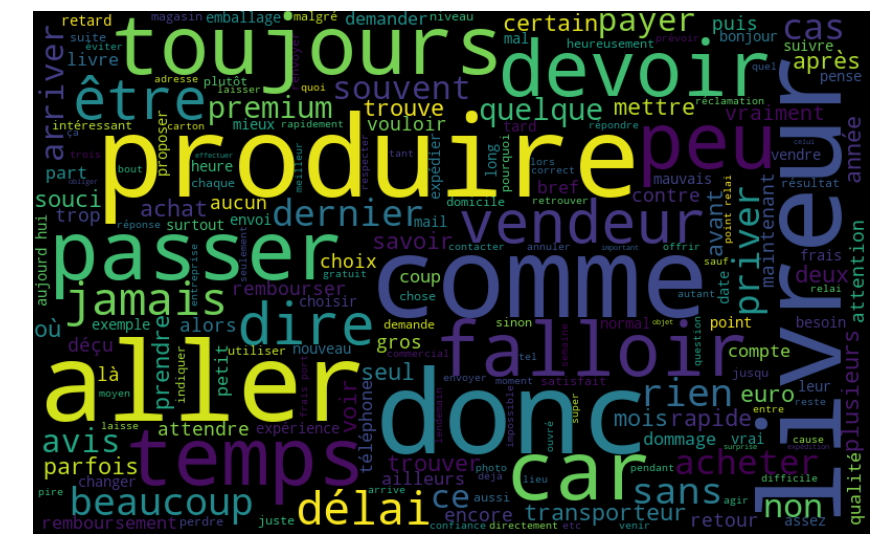

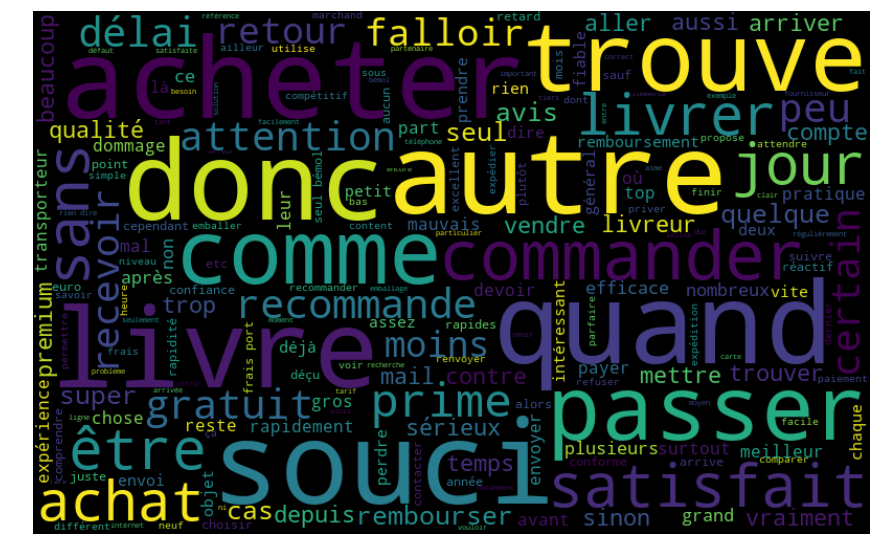

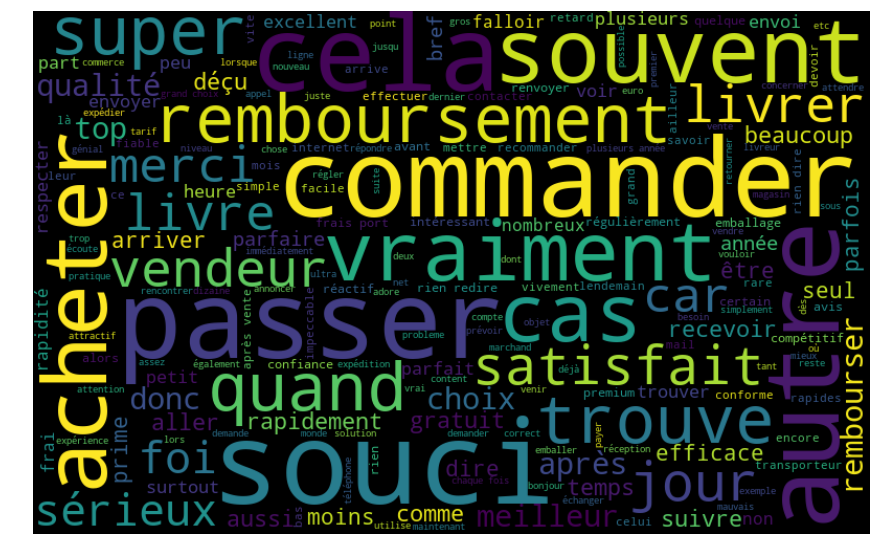

In [14]:
# WordCloud par catégorie de commentaires

from wordcloud import WordCloud


delimiteur = ' '
all_text = " "
texte = []

# Attention (0,1) OU (1,2,3,4,5)
start = 0
end   = nbCateg
if nbCateg == 5:
    start +=1
    end +=1

# Boucle sur les catégories de commentaires
for c in range(start, end):
    imageName = "wordcloud" + str(c)
    all_text = " "
    texte[:] = []
    df_uneCateg = df_comments.loc[df_comments['note'] == c]       # restriction des data à UNE catégorie de commentaire
    
    for row in df_uneCateg.itertuples(index=True, name='Pandas'):
        texte.append(delimiteur.join(row[1]))                     # row[1] correspond à la colonne 'comment'
 
    all_text = ' '.join([text for text in texte])    # réunir les commentaires en un seul texte

    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_text)
    plt.figure(figsize=(15, 12))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off');
    plt.savefig(imageName)


### Termes les plus représentatifs d'un commentaire : TF_IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer


delimiteur = ' '
texte = []

def tfidf(comment):
    com = delimiteur.join(comment)   # convertit une list en str
    texte.append(com)
    
df_comments['comment'].apply(tfidf)
  
tfidf = TfidfVectorizer(max_df=0.99, min_df = 0.01)
values = tfidf.fit_transform(texte)
print(tfidf.get_feature_names())
print("Nombre de features :", len(tfidf.get_feature_names()))


['abonnement', 'absolument', 'achat', 'acheter', 'acheteur', 'achète', 'adresse', 'affaire', 'afin', 'agir', 'ailleurs', 'ainsi', 'aller', 'alors', 'an', 'annoncer', 'annuler', 'année', 'appareil', 'appel', 'appeler', 'appelé', 'après', 'argent', 'arnaque', 'arrive', 'arriver', 'arrivé', 'arrivée', 'arrêter', 'assez', 'assurer', 'attendre', 'attente', 'attention', 'aucun', 'aujourd', 'auprès', 'aussi', 'autant', 'autre', 'avant', 'avis', 'bancaire', 'bas', 'beaucoup', 'besoin', 'bloquer', 'boite', 'bon', 'bonjour', 'bout', 'boîte', 'bref', 'bémol', 'cadeau', 'car', 'carte', 'carton', 'cas', 'cause', 'ce', 'cela', 'celui', 'cependant', 'certain', 'chance', 'changer', 'chaque', 'charge', 'chat', 'chercher', 'choisir', 'choix', 'chose', 'ci', 'clair', 'code', 'command', 'commander', 'comme', 'commencer', 'comment', 'commentaire', 'commerce', 'commercial', 'complètement', 'comprendre', 'compte', 'compétitif', 'concerner', 'concurrent', 'condition', 'confiance', 'confirmation', 'confirmer',

In [33]:
# 'max_df' is used for removing terms that appear too frequently.
# - max_df = 0.50        means  "ignore terms that appear in more than 50% of the documents"
# - max_df = 25          means  "ignore terms that appear in more than 25 documents"
# - Default max_df= 1.0  means  "the default setting does not ignore any terms"

# 'min_df' is used for removing terms that appear too infrequently.
# - min_df = 0.01        means "ignore terms that appear in less than 1% of the documents"
# - min_df = 5           means "ignore terms that appear in less than 5 documents"
# - Default min_df= 1.0  means "the default setting does not ignore any terms

In [15]:
feature_names = tfidf.get_feature_names()
corpus_index = [n for n in list(tfidf.vocabulary_.keys())]
df = pd.DataFrame(values.todense(), columns=feature_names)   # todense():  convert sparse matrix to numpy array
print("Nombre de MOTS(features) retenus :", len(feature_names),"\n")

# Sauvegarde de la matrice dans un fichier excel, plus facile à consulter
# df.to_excel('C:/Users/loic/Documents/Formation/Data Analyst/Projet_8/features_TfIdf.xlsx',sheet_name='sheet1',index=False)

adf = df.rename_axis('ID').values   # adf: numpy.ndarray
print("\nTaille de adf:", len(adf))

Nombre de MOTS(features) retenus : 522 


Taille de adf: 4975


In [16]:
# Split train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(adf, df_comments['note'].tolist(), test_size=0.2, random_state=1)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

if nbCateg == 2:
    print(y_train.count(0), "commentaires 0")
    print(y_train.count(1), "commentaires 1")
else:
    print(y_train.count(1), "commentaires *")
    print(y_train.count(2), " commentaires **")
    print(y_train.count(3), " commentaires ***")
    print(y_train.count(4), " commentaires ****")
    print(y_train.count(5), "commentaires *****")

#   random_state :  = nombre => le résultat du split sera toujours le même

X_train: (3980, 522)
X_test: (995, 522)
2163 commentaires 0
1817 commentaires 1


In [17]:
# Model Building and Evaluation

from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)   # create a Multinomial Naive Bayes classifier object
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted),  "\n")

# accuracy_score par catégorie de commentaire (*,**,***,****,*****)
len(y_test)      # 386
len(predicted)   # 386
type(y_test)     # list
type(predicted)  # numpy.ndarray

nb0 = nb1 = nb2 = nb3 = nb4 = nb5 = 0
dic_result = {}
dic_result[0] = dic_result[1] = dic_result[2] = dic_result[3] = dic_result[4] = dic_result[5] = 0


if nbCateg == 2:
    nb0 = y_test.count(0); print("Nombre de commentaires 0 :", nb0)
    nb1 = y_test.count(1); print("Nombre de commentaires 1 :", nb1)
else:
    nb1 = y_test.count(1); print("Nombre de commentaires 1* :", nb1)
    nb2 = y_test.count(2); print("Nombre de commentaires 2* :", nb2)
    nb3 = y_test.count(3); print("Nombre de commentaires 3* :", nb3)
    nb4 = y_test.count(4); print("Nombre de commentaires 4* :", nb4)
    nb5 = y_test.count(5); print("Nombre de commentaires 5* :", nb5)
                             
for i in range(0,len(y_test)):
    if y_test[i] == predicted[i]:
        dic_result[y_test[i]] = dic_result.get(y_test[i]) + 1   # Bonne prédiction pour la catégorie y_test[i]
        
# Performances de classification sur les données test :
if nbCateg == 2:
    print("Accuracy commentaires 0 : ", dic_result.get(0)/nb0)
    print("Accuracy commentaires 1 : ", dic_result.get(1)/nb1)
else:
    print("Accuracy commentaires 1* : ", dic_result.get(1)/nb1)
    print("Accuracy commentaires 2* : ", dic_result.get(2)/nb2)
    print("Accuracy commentaires 3* : ", dic_result.get(3)/nb3)
    print("Accuracy commentaires 4* : ", dic_result.get(4)/nb4)
    print("Accuracy commentaires 5* : ", dic_result.get(5)/nb5)

MultinomialNB Accuracy: 0.949748743718593 

Nombre de commentaires 0 : 552
Nombre de commentaires 1 : 443
Accuracy commentaires 0 :  0.9728260869565217
Accuracy commentaires 1 :  0.9209932279909706


In [18]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X = adf
y = stars

clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
predicted = clf.predict(X_test)

print("OneVsRest Accuracy:",metrics.accuracy_score(y_test, predicted))


# --------------------------------------------------------------------------------------------------
nb0 = nb1 = nb2 = nb3 = nb4 = nb5 = 0
dic_result = {}
dic_result[0] = dic_result[1] = dic_result[2] = dic_result[3] = dic_result[4] = dic_result[5] = 0


if nbCateg == 2:
    nb0 = y_test.count(0); print("Nombre de commentaires 0 :", nb0)
    nb1 = y_test.count(1); print("Nombre de commentaires 1 :", nb1)
else:
    nb1 = y_test.count(1); print("Nombre de commentaires 1* :", nb1)
    nb2 = y_test.count(2); print("Nombre de commentaires 2* :", nb2)
    nb3 = y_test.count(3); print("Nombre de commentaires 3* :", nb3)
    nb4 = y_test.count(4); print("Nombre de commentaires 4* :", nb4)
    nb5 = y_test.count(5); print("Nombre de commentaires 5* :", nb5)
                             
for i in range(0,len(y_test)):
    if y_test[i] == predicted[i]:
        dic_result[y_test[i]] = dic_result.get(y_test[i]) + 1   # Bonne prédiction pour la catégorie y_test[i]
        
# Performances de classification sur les données test :
if nbCateg == 2:
    print("Accuracy commentaires 0 : ", dic_result.get(0)/nb0)
    print("Accuracy commentaires 1 : ", dic_result.get(1)/nb1)
else:
    print("Accuracy commentaires 1* : ", dic_result.get(1)/nb1)
    print("Accuracy commentaires 2* : ", dic_result.get(2)/nb2)
    print("Accuracy commentaires 3* : ", dic_result.get(3)/nb3)
    print("Accuracy commentaires 4* : ", dic_result.get(4)/nb4)
    print("Accuracy commentaires 5* : ", dic_result.get(5)/nb5)

OneVsRest Accuracy: 0.9658291457286432
Nombre de commentaires 0 : 552
Nombre de commentaires 1 : 443
Accuracy commentaires 0 :  0.9692028985507246
Accuracy commentaires 1 :  0.9616252821670429


In [19]:
# Application des forêts aléatoires  (Random Forests)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, oob_score=True)
model = rfc.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

predicted = rfc.predict(X_test)
print("Forêts aléatoires accuracy {:.2f}".format(accuracy_score(y_test, predicted)))
print(X_train.shape)

from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(rfc, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)   # diminution du nombre de features


# --------------------------------------------------------------------------------------------------
nb0 = nb1 = nb2 = nb3 = nb4 = nb5 = 0
dic_result = {}
dic_result[0] = dic_result[1] = dic_result[2] = dic_result[3] = dic_result[4] = dic_result[5] = 0


if nbCateg == 2:
    nb0 = y_test.count(0); print("Nombre de commentaires 0 :", nb0)
    nb1 = y_test.count(1); print("Nombre de commentaires 1 :", nb1)
else:
    nb1 = y_test.count(1); print("Nombre de commentaires 1* :", nb1)
    nb2 = y_test.count(2); print("Nombre de commentaires 2* :", nb2)
    nb3 = y_test.count(3); print("Nombre de commentaires 3* :", nb3)
    nb4 = y_test.count(4); print("Nombre de commentaires 4* :", nb4)
    nb5 = y_test.count(5); print("Nombre de commentaires 5* :", nb5)
                             
for i in range(0,len(y_test)):
    if y_test[i] == predicted[i]:
        dic_result[y_test[i]] = dic_result.get(y_test[i]) + 1   # Bonne prédiction pour la catégorie y_test[i]
        
# Performances de classification sur les données test :
if nbCateg == 2:
    print("Accuracy commentaires 0 : ", dic_result.get(0)/nb0)
    print("Accuracy commentaires 1 : ", dic_result.get(1)/nb1)
else:
    print("Accuracy commentaires 1* : ", dic_result.get(1)/nb1)
    print("Accuracy commentaires 2* : ", dic_result.get(2)/nb2)
    print("Accuracy commentaires 3* : ", dic_result.get(3)/nb3)
    print("Accuracy commentaires 4* : ", dic_result.get(4)/nb4)
    print("Accuracy commentaires 5* : ", dic_result.get(5)/nb5)

Forêts aléatoires accuracy 0.94
(3980, 522)
(3980, 66)
Nombre de commentaires 0 : 552
Nombre de commentaires 1 : 443
Accuracy commentaires 0 :  0.9311594202898551
Accuracy commentaires 1 :  0.9435665914221218


In [21]:
# SVM multi-classe:
#
# Support Vector Machine

from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

# X, y = make_classification(n_features=4, random_state=0)
clf = LinearSVC(random_state=0, tol=1e-5, multi_class='ovr')   # par défaut approche 'ovr'
# clf = LinearSVC(random_state=0, tol=1e-5, multi_class='crammer_singer')
clf.fit(X_train, y_train)
LinearSVC(random_state=0, tol=1e-05)
predicted = clf.predict(X_test)
print("SVM multi-classe Accuracy:",metrics.accuracy_score(y_test, predicted))

# --------------------------------------------------------------------------------------------------
nb0 = nb1 = nb2 = nb3 = nb4 = nb5 = 0
dic_result = {}
dic_result[0] = dic_result[1] = dic_result[2] = dic_result[3] = dic_result[4] = dic_result[5] = 0


if nbCateg == 2:
    nb0 = y_test.count(0); print("Nombre de commentaires 0 :", nb0)
    nb1 = y_test.count(1); print("Nombre de commentaires 1 :", nb1)
else:
    nb1 = y_test.count(1); print("Nombre de commentaires 1* :", nb1)
    nb2 = y_test.count(2); print("Nombre de commentaires 2* :", nb2)
    nb3 = y_test.count(3); print("Nombre de commentaires 3* :", nb3)
    nb4 = y_test.count(4); print("Nombre de commentaires 4* :", nb4)
    nb5 = y_test.count(5); print("Nombre de commentaires 5* :", nb5)
                             
for i in range(0,len(y_test)):
    if y_test[i] == predicted[i]:
        dic_result[y_test[i]] = dic_result.get(y_test[i]) + 1   # Bonne prédiction pour la catégorie y_test[i]
        
# Performances de classification sur les données test :
if nbCateg == 2:
    print("Accuracy commentaires 0 : ", dic_result.get(0)/nb0)
    print("Accuracy commentaires 1 : ", dic_result.get(1)/nb1)
else:
    print("Accuracy commentaires 1* : ", dic_result.get(1)/nb1)
    print("Accuracy commentaires 2* : ", dic_result.get(2)/nb2)
    print("Accuracy commentaires 3* : ", dic_result.get(3)/nb3)
    print("Accuracy commentaires 4* : ", dic_result.get(4)/nb4)
    print("Accuracy commentaires 5* : ", dic_result.get(5)/nb5)

SVM multi-classe Accuracy: 0.9547738693467337
Nombre de commentaires 0 : 552
Nombre de commentaires 1 : 443
Accuracy commentaires 0 :  0.9510869565217391
Accuracy commentaires 1 :  0.9593679458239278


#         TESTS

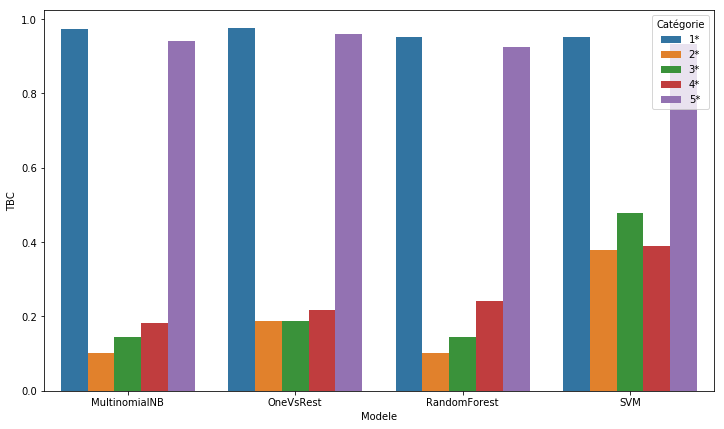

In [26]:
import seaborn as sns

# 1. TBC par catégorie pour Classifieur 5 classes inégales
f, ax = plt.subplots(figsize=(12, 7))
df3 = pd.DataFrame({'Modele': ['MultinomialNB', 'MultinomialNB', 'MultinomialNB', 'MultinomialNB', 'MultinomialNB', 'OneVsRest', 'OneVsRest', 'OneVsRest', 'OneVsRest', 'OneVsRest', 'RandomForest', 'RandomForest', 'RandomForest', 'RandomForest', 'RandomForest', 'SVM', 'SVM', 'SVM', 'SVM', 'SVM'],
                    'TBC': [0.973, 0.103, 0.145, 0.183, 0.940, 0.975, 0.189, 0.187, 0.218, 0.960, 0.952, 0.103, 0.145, 0.241, 0.926, 0.952, 0.379, 0.479, 0.390, 0.932],
                    'Catégorie': ['1*', '2*', '3*', '4*', '5*', '1*', '2*', '3*', '4*', '5*', '1*', '2*', '3*', '4*', '5*', '1*', '2*', '3*', '4*', '5*']},
                        columns = ['Modele', 'TBC', 'Catégorie'])

sns.barplot(data = df3, x = 'Modele',y = 'TBC', hue = 'Catégorie')
                    
plt.savefig("TBC5INEQUAL")

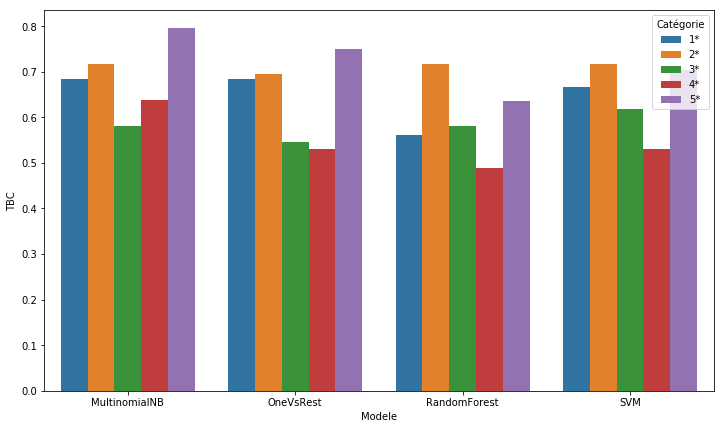

In [27]:
# 2. TBC par catégorie pour Classifieur 5 classes égales

f, ax = plt.subplots(figsize=(12, 7))
df4 = pd.DataFrame({'Modele': ['MultinomialNB', 'MultinomialNB', 'MultinomialNB', 'MultinomialNB', 'MultinomialNB', 'OneVsRest', 'OneVsRest', 'OneVsRest', 'OneVsRest', 'OneVsRest', 'RandomForest', 'RandomForest', 'RandomForest', 'RandomForest', 'RandomForest', 'SVM', 'SVM', 'SVM', 'SVM', 'SVM'],
                    'TBC': [0.684, 0.717, 0.581, 0.638, 0.795, 0.684, 0.695, 0.545, 0.531, 0.750, 0.561, 0.717, 0.581, 0.489, 0.636, 0.666, 0.717, 0.618, 0.531, 0.704],
                    'Catégorie': ['1*', '2*', '3*', '4*', '5*', '1*', '2*', '3*', '4*', '5*', '1*', '2*', '3*', '4*', '5*', '1*', '2*', '3*', '4*', '5*']},
                        columns = ['Modele', 'TBC', 'Catégorie'])

sns.barplot(data = df4, x = 'Modele',y = 'TBC', hue = 'Catégorie')

plt.savefig("TBC5EQUAL")

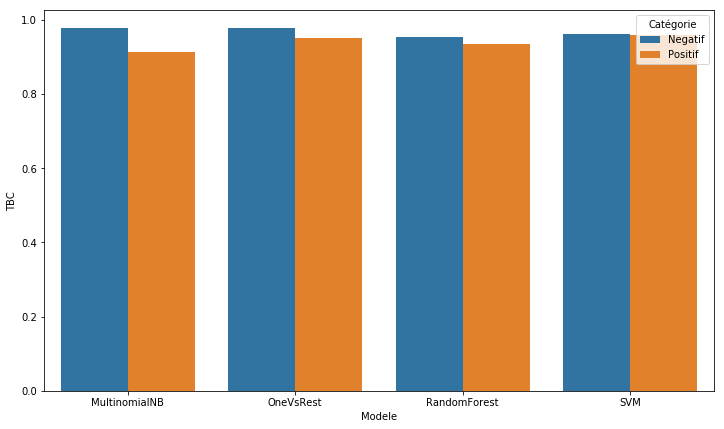

In [28]:
# 3. TBC par catégorie pour Classifieur 2 classes inégales

f, ax = plt.subplots(figsize=(12, 7))
df2 = pd.DataFrame({'Modele': ['MultinomialNB', 'MultinomialNB', 'OneVsRest', 'OneVsRest', 'RandomForest', 'RandomForest', 'SVM', 'SVM'],
                    'TBC': [0.977, 0.914, 0.977, 0.950, 0.953, 0.934, 0.961, 0.959],
                    'Catégorie': ['Negatif', 'Positif', 'Negatif', 'Positif', 'Negatif', 'Positif', 'Negatif', 'Positif']},
                        columns = ['Modele', 'TBC', 'Catégorie'])

sns.barplot(data = df2, x = 'Modele',y = 'TBC', hue = 'Catégorie')
                    
plt.savefig("TBC2INEQUAL")

In [ ]:
from spacy import displacy

# nlp_fr = spacy.load('fr_core_news_md')   # même précision mais résultats différents parfois
nlp_fr = spacy.load("fr_core_news_sm")

doc1 = nlp_fr("AMAZON est une entreprise prospère que Mr Trump dirige depuis Paris")
doc2 = nlp_fr("Amazon est une entreprise prospère que Mr Macron dirige depuis paris")
doc3 = nlp_fr("Amazon et Bouygues sont des entreprises prospères que Mr Macron dirige depuis paris")
doc4 = nlp_fr("AMAZON est une entreprise prospère que Mr Chirac dirige depuis paris")

displacy.render(doc1, style="ent", jupyter=True)
print("\n")
displacy.render(doc2, style="ent", jupyter=True)
print("\n")
displacy.render(doc3, style="ent", jupyter=True)
print("\n")
displacy.render(doc4, style="ent", jupyter=True)

# French NER with polyglot ?
# Majuscule ou Minuscule, çà ne change pas la lemmatization

new_sentence = []
doc = nlp(doc1)
for word in doc:
    new_sentence.append(word.lemma_)

new_sentence = []
doc = nlp(doc2)
for word in doc:
        new_sentence.append(word.lemma_)

new_sentence = []
doc = nlp(doc3)
for word in doc:
        new_sentence.append(word.lemma_)
        
new_sentence = []
doc = nlp(doc4)
for word in doc:
        new_sentence.append(word.lemma_)


In [29]:
# TEST Lemmatisation

texte = "j'aimais j'aime et j'aimerai les tulipes blanches"
print("AVANT:\n", texte)

new_sentence = []
doc = nlp(texte)
for word in doc:
    new_sentence.append(word.lemma_)

print("\nAPRES:\n", new_sentence)

AVANT:
 j'aimais j'aime et j'aimerai les tulipes blanches

APRES:
 ['je', 'aimer', 'je', 'aime', 'et', 'je', 'aimer', 'le', 'tulipe', 'blanc']
